In [163]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [164]:
# Define the function to generate a random maze
def generate_random_maze(rows, cols, obstacle_probability=0.3):
    return [[0 if random.random() > obstacle_probability else 1 for _ in range(cols)] for _ in range(rows)]

In [165]:
# Define the grid as a 2D list of 0 (empty) and 1 (obstacle)
grid_rows = int(input("Enter the number of rows: "))
grid_cols = int(input("Enter the number of columns: "))
obstacle_probability = 0.2
grid = generate_random_maze(grid_rows, grid_cols, obstacle_probability)
print(grid)

Enter the number of rows: 5
Enter the number of columns: 5
[[0, 1, 1, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1]]


In [166]:
# Define Start & Goal points
start = (0, 0)
goal = (grid_rows-1), (grid_cols-1)

grid[0][0] = 0
grid[grid_rows-1][grid_cols-1] = 0

In [167]:
def heuristic(node , goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])     # Menhatin Distance

In [168]:
def get_children(node):
    children= []
    r,c = node
    
    if r > 0 and grid[r-1][c] == 0:    # up
        children.append((r-1,c))
        
    if r < len(grid)-1 and grid[r+1][c]== 0: # down
        children.append((r+1,c))
       
    if c < len(grid[0])-1 and grid[r][c+1] ==0 :   # Right
        children.append((r,c+1))
        
    if c > 0 and grid[r][c-1] == 0:
        children.append((r,c-1))
        
    return children

In [169]:
def astar():
    
    Frontier =[]
    Expanded =[]
    
    Frontier.append((start , 0 + heuristic(start ,goal) , 0 ,None))
    
    while Frontier :
        Frontier.sort(key = lambda x:x[1])
        current = Frontier.pop(0)
        node , _ , g , parent = current
        
        if node == goal :
            path = [node]
            while parent :
               path.append(parent) 
               parent = next(x[3] for x in Expanded if x[0] == parent)
            return path[::-1]
        
        Expanded.append(current)
        children = get_children(node)
        for child in children :
            g_child = g+1
            h_child = heuristic(child ,goal)
            
            if any(x[0] == child for x in Expanded):
                continue
            
            if any(x[0]== child for x in Frontier):
                g_exist = next(x[2] for x in Frontier if x[0] == child)
                
                if g_exist > g_child:
                    Frontier.append(x for x in Frontier if x[0] != child )
                    Frontier.append((child , g_child + h_child , g_child , node))
            else:
               Frontier.append((child , g_child + h_child ,g_child ,node))
    return None

In [170]:
result = astar()
if result:
    print("The shortest path is:")
    for node in result:
        print(node)
        
        
    
else:
    print("No path is found.")

No path is found.


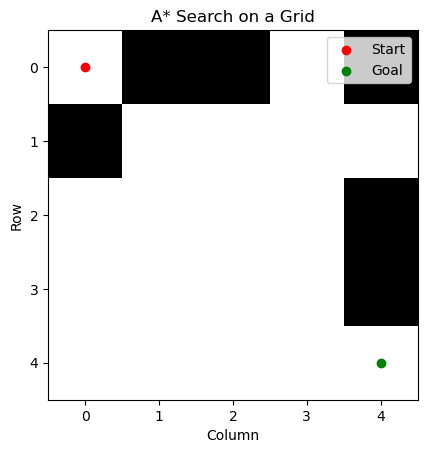

In [171]:
grid = np.array(grid)

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the grid as an image with different colors for obstacles and free cells
ax.imshow(grid, cmap="Greys")

# Plot the start and goal positions as red and green dots
ax.scatter(start[1], start[0], color="red", marker="o", label="Start")
ax.scatter(goal[1], goal[0], color="green", marker="o", label="Goal")

# Plot the shortest path as a blue line
if result:
    path = np.array(result)
    ax.plot(path[:, 1], path[:, 0], color="blue", label="Path")

# Add labels and title
ax.set_xlabel("Column")
ax.set_ylabel("Row")
ax.set_title("A* Search on a Grid")

# Add a legend
ax.legend()

# Show the plot
plt.show()